## Importing Libraries

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import wordcloud as wd
import seaborn as sns
sns.set()
import PIL as Pl
from collections import Counter

## Importing Source File

In [123]:
Source_File=pd.read_excel('vgsales.xlsx', index_col=0)
Source_File

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01


## Cleaning the Data

In [67]:
#### Detecting Duplicate
Source_File_Dup=Source_File.duplicated()
Source_File_Dup

Rank
1        False
2        False
3        False
4        False
5        False
         ...  
16596    False
16597    False
16598    False
16599    False
16600    False
Length: 16598, dtype: bool

In [69]:
#### Changing NAN values to 0
Source_File1=Source_File.fillna(0)
Source_File1

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01


## Removing_0_Years

In [70]:
Cond_No_0=(Source_File1['Year']!=0)
Source_File_N0_0=Source_File1.loc[Cond_No_0]
Source_File_N0_0

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01


## Filtering from Year 1980 to 1999 (20th Century)

In [71]:
###Filtering from 1980-1999
Cond_20thCent=(Source_File_N0_0['Year']< 2000)
Source_File_20cent=Source_File_N0_0.loc[Cond_20thCent]
Source_File_20cent.sample(100)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
5247,Boxer's Road,PS,1995.0,Fighting,New,0.00,0.00,0.33,0.02,0.36
4483,Neon Genesis Evangelion,SAT,1996.0,Adventure,Sega,0.00,0.00,0.44,0.00,0.44
7243,NHL Championship 2000,PS,1998.0,Sports,Fox Interactive,0.12,0.08,0.00,0.01,0.22
5291,Mega Man X3,SNES,1995.0,Action,Laguna,0.04,0.01,0.30,0.00,0.35
3469,International Superstar Soccer '98,N64,1998.0,Sports,Konami Digital Entertainment,0.06,0.30,0.19,0.03,0.58
...,...,...,...,...,...,...,...,...,...,...
9711,Echo Night,PS,1998.0,Adventure,From Software,0.03,0.02,0.07,0.01,0.12
2095,Oddworld: Abe's Exoddus,PS,1998.0,Platform,GT Interactive,0.55,0.38,0.00,0.06,0.99
3401,Jikkyou Powerful Pro Yakyuu '98 Kaimakuban,PS,1998.0,Sports,Konami Digital Entertainment,0.00,0.00,0.55,0.04,0.59


## FInding the 4 Most Popular Platform in the 20th Century

In [72]:
Platform_dict20=dict(Counter(Source_File_20cent['Platform']).most_common(4))
Platform_dict20

{'PS': 916, 'N64': 246, 'SNES': 239, 'SAT': 173}

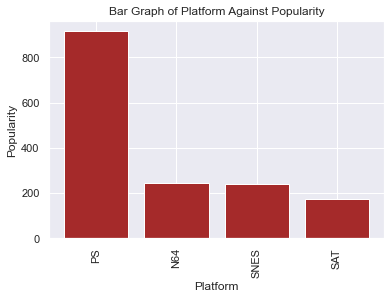

In [73]:
# Specifying X and Y Values - X-axis(Keys), Y-axis(Values)
plt.bar(Platform_dict20.keys(), Platform_dict20.values(), color='Brown')

#Providing Legends and Titles
plt.title('Bar Graph of Platform Against Popularity')
plt.ylabel('Popularity')
plt.xlabel('Platform')

#Preventing X-labels Overlap
plt.xticks(rotation=90)

#Preventing Extra_Information
plt.show()

## Highest Average_Global_Sales(Platform)

In [74]:
Platform_grp=Source_File_20cent.groupby(['Platform'])
Platform_Average_Global=(dict(Platform_grp['Global_Sales'].mean().nlargest(5)))
Platform_Average_Global

{'GB': 3.2202857142857146,
 'NES': 2.561938775510204,
 'PC': 1.251,
 'GEN': 1.0503703703703704,
 'SNES': 0.8370292887029289}

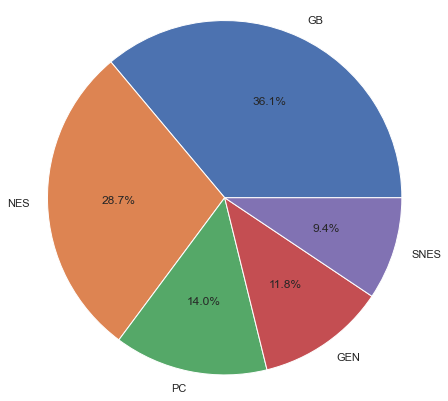

In [75]:
#Specifying the Figure Size
plt.figure(figsize=(7,7))

#Introducing the Pie Chart, autopct enables percentages on the diagram, 1f meands to 1 decimal place
plt.pie(Platform_Average_Global.values(), labels=Platform_Average_Global.keys(), autopct=('%1.1f%%'))

plt.axis('equal')
plt.show()

## FInding the 4 Most Popular Publisher in the 20th Century

In [76]:
Publisher_dict20=dict(Counter(Source_File_20cent['Publisher']).most_common(4))
Publisher_dict20

{'Nintendo': 171,
 'Sony Computer Entertainment': 155,
 'Konami Digital Entertainment': 125,
 'Sega': 116}

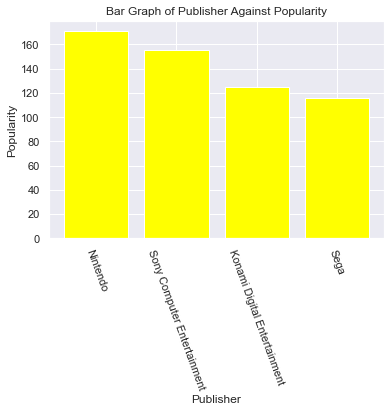

In [77]:
# Specifying X and Y Values - X-axis(Keys), Y-axis(Values)
plt.bar(Publisher_dict20.keys(), Publisher_dict20.values(), color='Yellow')

#Providing Legends and Titles
plt.title('Bar Graph of Publisher Against Popularity')
plt.ylabel('Popularity')
plt.xlabel('Publisher')

#Preventing X-labels Overlap
plt.xticks(rotation=290)

#Preventing Extra_Information
plt.show()

## Highest Average_Global_Sales(Publisher)

In [78]:
Publisher_grp=Source_File_20cent.groupby(['Publisher'])
Publisher_Average_Global=(dict(Publisher_grp['Global_Sales'].mean(5).nlargest(5)))
Publisher_Average_Global

{'Palcom': 4.17,
 'Nintendo': 3.5057309941520467,
 'Red Orb': 2.62,
 'Microsoft Game Studios': 2.61,
 'Arena Entertainment': 2.36}

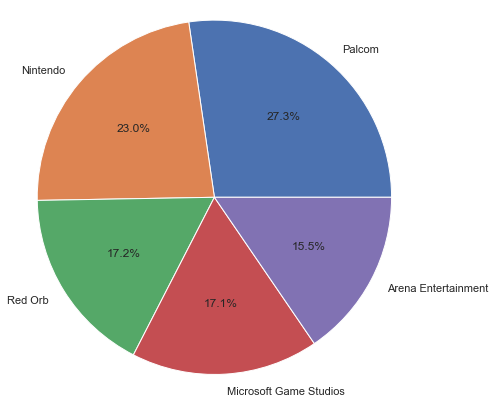

In [79]:
#Specifying the Figure Size
plt.figure(figsize=(7,7))

#Introducing the Pie Chart, autopct enables percentages on the diagram, 1f meands to 1 decimal place
plt.pie(Publisher_Average_Global.values(), labels=Publisher_Average_Global.keys(), autopct=('%1.1f%%'))

plt.axis('equal')
plt.show()

## FInding the 4 Most Popular Genre in the 20th Century

In [80]:
Genre_dict20=dict(Counter(Source_File_20cent['Genre']).most_common(4))
Genre_dict20

{'Sports': 327, 'Action': 228, 'Fighting': 197, 'Racing': 191}

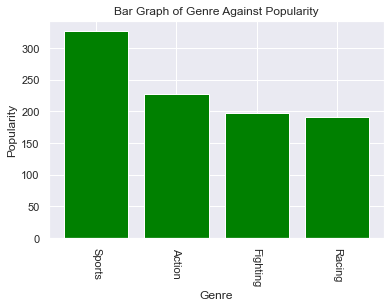

In [121]:
# Specifying X and Y Values - X-axis(Keys), Y-axis(Values)
plt.bar(Genre_dict20.keys(), Genre_dict20.values(), color='Green')

#Providing Legends and Titles
plt.title('Bar Graph of Genre Against Popularity')
plt.ylabel('Popularity')
plt.xlabel('Genre')

#Preventing X-labels Overlap
plt.xticks(rotation=270)

#Preventing Extra_Information
plt.show()

## Highest Average_Global_Sales(Genre)

In [86]:
Genre_grp20=Source_File_20cent.groupby(['Genre'])
Genre_Average_Global20=(dict(Genre_grp20['Global_Sales'].mean().nlargest(5)))
Genre_Average_Global20

{'Platform': 2.096075949367089,
 'Puzzle': 1.1302222222222222,
 'Role-Playing': 1.1037016574585636,
 'Racing': 0.8507853403141361,
 'Action': 0.8353947368421053}

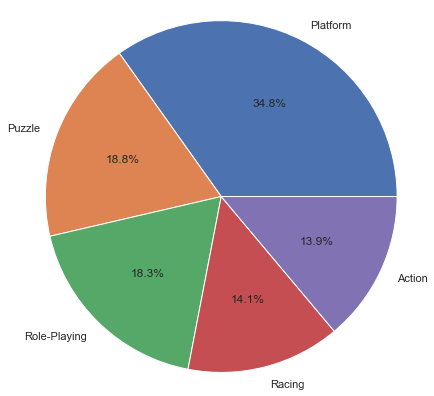

In [92]:
#Specifying the Figure Size
plt.figure(figsize=(7,7))

#Introducing the Pie Chart, autopct enables percentages on the diagram, 1f meands to 1 decimal place
plt.pie(Genre_Average_Global20.values(), labels=Genre_Average_Global20.keys(), autopct=('%1.1f%%'))

plt.axis('equal')
plt.show()

## Filtering from Year 2000 to 2020 (21st Century)

In [93]:
Cond_21Cent=(Source_File_N0_0['Year']> 1999)
Source_File_21cent=Source_File_N0_0.loc[Cond_21Cent]

Source_File_21cent.sample(100)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
15603,Emergency 2012,DS,2010.0,Simulation,Rondomedia,0.00,0.02,0.00,0.00,0.02
11856,Romance of the Three Kingdoms XI,PS2,2007.0,Strategy,Tecmo Koei,0.00,0.00,0.07,0.00,0.07
9794,The King of Fighters Collection: The Orochi Saga,Wii,2008.0,Fighting,Ignition Entertainment,0.11,0.00,0.00,0.01,0.12
10368,Rock Revolution,DS,2008.0,Misc,Konami Digital Entertainment,0.10,0.00,0.00,0.01,0.11
12183,Nobunaga no Yabou: Tendou with Power-Up Kit,PS3,2011.0,Strategy,Tecmo Koei,0.00,0.00,0.07,0.00,0.07
...,...,...,...,...,...,...,...,...,...,...
5327,From TV Animation One Piece: Tobidase Kaizokudan!,PS,2001.0,Role-Playing,Namco Bandai Games,0.00,0.00,0.32,0.02,0.35
9299,Apex,XB,2003.0,Racing,Atari,0.10,0.03,0.00,0.00,0.14
741,High School Musical: Makin' the Cut!,DS,2007.0,Puzzle,Disney Interactive Studios,1.06,0.91,0.00,0.23,2.20


## FInding the 4 Most Popular Platform in the 20th Century

In [95]:
Platform_dict21 =dict(Counter(Source_File_21cent['Platform']).most_common(4))
Platform_dict21

{'DS': 2132, 'PS2': 2127, 'PS3': 1304, 'Wii': 1290}

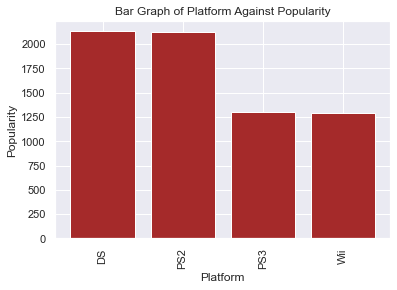

In [96]:
# Specifying X and Y Values - X-axis(Keys), Y-axis(Values)
plt.bar(Platform_dict21.keys(), Platform_dict21.values(), color='Brown')

#Providing Legends and Titles
plt.title('Bar Graph of Platform Against Popularity')
plt.ylabel('Popularity')
plt.xlabel('Platform')

#Preventing X-labels Overlap
plt.xticks(rotation=90)

#Preventing Extra_Information
plt.show()

## Highest Average_Global_Sales(Platform)

In [98]:
Platform_grp21=Source_File_21cent.groupby(['Platform'])
Platform_Average_Global21=(dict(Platform_grp21['Global_Sales'].mean().nlargest(5)))
Platform_Average_Global21

{'GB': 1.0740740740740742,
 'PS4': 0.8276785714285715,
 'X360': 0.7851093117408907,
 'PS3': 0.7280291411042945,
 'Wii': 0.7052790697674418}

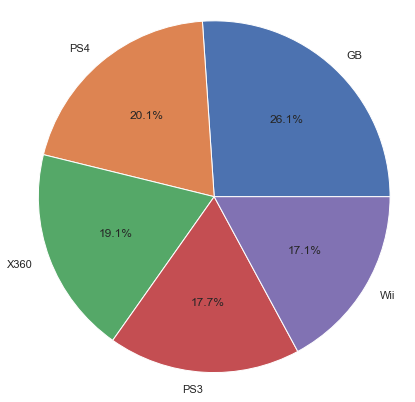

In [99]:
#Specifying the Figure Size
plt.figure(figsize=(7,7))

#Introducing the Pie Chart, autopct enables percentages on the diagram, 1f meands to 1 decimal place
plt.pie(Platform_Average_Global21.values(), labels=Platform_Average_Global21.keys(), autopct=('%1.1f%%'))

plt.axis('equal')
plt.show()

## Finding the 4 Most Popular Genre in the 21st Century

In [100]:
Genre_dict21=dict(Counter(Source_File_21cent['Genre']).most_common(4))
Genre_dict21

{'Action': 3025, 'Sports': 1977, 'Misc': 1586, 'Role-Playing': 1290}

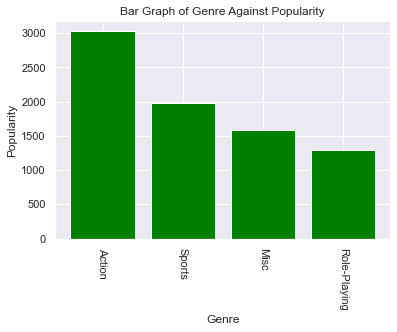

In [101]:
# Specifying X and Y Values - X-axis(Keys), Y-axis(Values)
plt.bar(Genre_dict21.keys(), Genre_dict21.values(), color='Green')

#Providing Legends and Titles
plt.title('Bar Graph of Genre Against Popularity')
plt.ylabel('Popularity')
plt.xlabel('Genre')

#Preventing X-labels Overlap
plt.xticks(rotation=270)

#Preventing Extra_Information
plt.show()

## Highest_Average_Global_Sales(Genre)

In [102]:
Genre_grp21=Source_File_21cent.groupby(['Genre'])
Genre_Average_Global21=(dict(Genre_grp21['Global_Sales'].mean().nlargest(5)))
Genre_Average_Global21

{'Shooter': 0.8048968609865471,
 'Platform': 0.6935515320334262,
 'Sports': 0.571770359129995,
 'Role-Playing': 0.5612945736434108,
 'Racing': 0.5451884057971015}

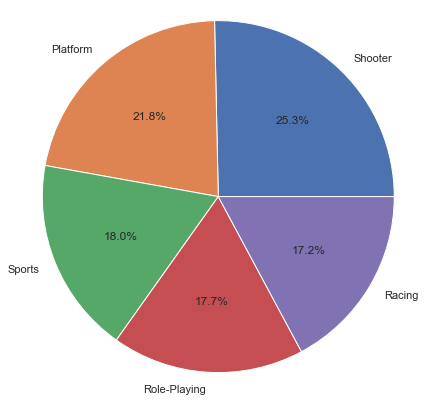

In [103]:
#Specifying the Figure Size
plt.figure(figsize=(7,7))

#Introducing the Pie Chart, autopct enables percentages on the diagram, 1f meands to 1 decimal place
plt.pie(Genre_Average_Global21.values(), labels=Genre_Average_Global21.keys(), autopct=('%1.1f%%'))

plt.axis('equal')
plt.show()

## FInding the 4 Most Popular Publisher in the 20th Century

In [104]:
Publisher_dict21=dict(Counter(Source_File_21cent['Publisher']).most_common(4))
Publisher_dict21

{'Electronic Arts': 1231,
 'Activision': 910,
 'Ubisoft': 899,
 'Namco Bandai Games': 840}

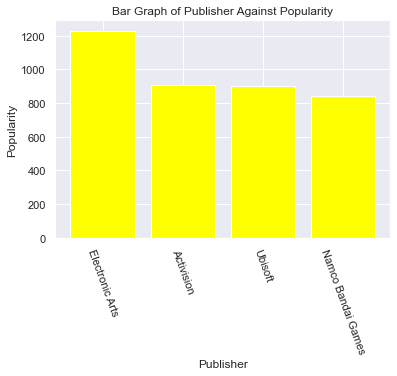

In [105]:
# Specifying X and Y Values - X-axis(Keys), Y-axis(Values)
plt.bar(Publisher_dict21.keys(), Publisher_dict21.values(), color='Yellow')

#Providing Legends and Titles
plt.title('Bar Graph of Publisher Against Popularity')
plt.ylabel('Popularity')
plt.xlabel('Publisher')

#Preventing X-labels Overlap
plt.xticks(rotation=290)

#Preventing Extra_Information
plt.show()

## Highest Average_Global_Sales(Publisher)

In [106]:
Publisher_grp21=Source_File_21cent.groupby(['Publisher'])
Publisher_Average_Global21=(dict(Publisher_grp21['Global_Sales'].mean(5).nlargest(5)))
Publisher_Average_Global21

{'Nintendo': 2.257047619047619,
 'RedOctane': 2.17,
 'Valve': 1.74,
 'Hello Games': 1.6,
 'Sony Computer Entertainment Europe': 1.5926666666666667}

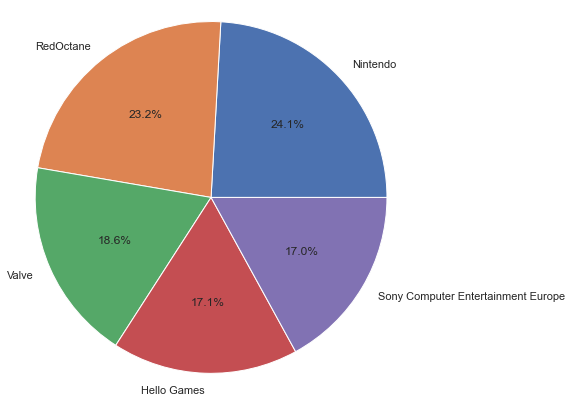

In [107]:
#Specifying the Figure Size
plt.figure(figsize=(7,7))

#Introducing the Pie Chart, autopct enables percentages on the diagram, 1f meands to 1 decimal place
plt.pie(Publisher_Average_Global21.values(), labels=Publisher_Average_Global21.keys(), autopct=('%1.1f%%'))

plt.axis('equal')
plt.show()

## Filtering only 0 Years

In [108]:
Cond_0=(Source_File1['Year'] ==0)
Source_File_0=Source_File1.loc[Cond_0]
Source_File_0

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
180,Madden NFL 2004,PS2,0.0,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
378,FIFA Soccer 2004,PS2,0.0,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
432,LEGO Batman: The Videogame,Wii,0.0,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
471,wwe Smackdown vs. Raw 2006,PS2,0.0,Fighting,0,1.57,1.02,0.00,0.41,3.00
608,Space Invaders,2600,0.0,Shooter,Atari,2.36,0.14,0.00,0.03,2.53
...,...,...,...,...,...,...,...,...,...,...
16310,Freaky Flyers,GC,0.0,Racing,Unknown,0.01,0.00,0.00,0.00,0.01
16330,Inversion,PC,0.0,Shooter,Namco Bandai Games,0.01,0.00,0.00,0.00,0.01
16369,Hakuouki: Shinsengumi Kitan,PS3,0.0,Adventure,Unknown,0.01,0.00,0.00,0.00,0.01


## FInding the 4 Most Popular Platform in Unknown Years

In [109]:
Platform_dict0 =dict(Counter(Source_File_0['Platform']).most_common(4))
Platform_dict0

{'Wii': 35, 'PS2': 34, 'X360': 30, 'DS': 30}

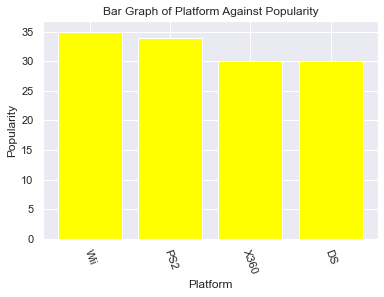

In [110]:
# Specifying X and Y Values - X-axis(Keys), Y-axis(Values)
plt.bar(Platform_dict0.keys(), Platform_dict0.values(), color='Yellow')

#Providing Legends and Titles
plt.title('Bar Graph of Platform Against Popularity')
plt.ylabel('Popularity')
plt.xlabel('Platform')

#Preventing X-labels Overlap
plt.xticks(rotation=290)

#Preventing Extra_Information
plt.show()

## Highest Average_Global_Sales(Platform)

In [111]:
Platform_grp0=Source_File_0.groupby(['Platform'])
Platform_Average_Global0=(dict(Platform_grp0['Global_Sales'].mean().nlargest(5)))
Platform_Average_Global0

{'GB': 1.03,
 'PS2': 0.6523529411764706,
 2600: 0.618235294117647,
 'Wii': 0.4828571428571428,
 'PS': 0.46714285714285714}

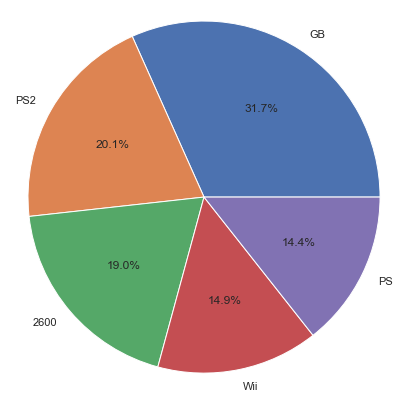

In [112]:
#Specifying the Figure Size
plt.figure(figsize=(7,7))

#Introducing the Pie Chart, autopct enables percentages on the diagram, 1f meands to 1 decimal place
plt.pie(Platform_Average_Global0.values(), labels=Platform_Average_Global0.keys(), autopct=('%1.1f%%'))

plt.axis('equal')
plt.show()

## FInding the 4 Most Popular Publisher in Unknown Years

In [113]:
Publisher_dict0 =dict(Counter(Source_File_0['Publisher']).most_common(4))
Publisher_dict0

{'Unknown': 103,
 0: 22,
 'Atari': 16,
 'Warner Bros. Interactive Entertainment': 15}

## Highest Average_Global_Sales(Publisher)

In [115]:
Publisher_grp0=Source_File_0.groupby(['Publisher'])
Publisher_Average_Global0=(dict(Publisher_grp0['Global_Sales'].mean().nlargest(5)))
Publisher_Average_Global0

{'LucasArts': 2.39,
 'MTV Games': 2.11,
 'Electronic Arts': 1.4108333333333334,
 'Eidos Interactive': 1.115,
 'Warner Bros. Interactive Entertainment': 0.77}

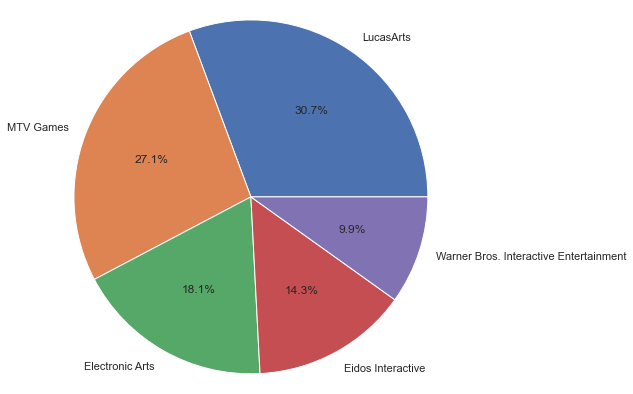

In [116]:
#Specifying the Figure Size
plt.figure(figsize=(7,7))

#Introducing the Pie Chart, autopct enables percentages on the diagram, 1f meands to 1 decimal place
plt.pie(Publisher_Average_Global0.values(), labels=Publisher_Average_Global0.keys(), autopct=('%1.1f%%'))

plt.axis('equal')
plt.show()

## FInding the 4 Most Popular Genre in Unknown Years

In [117]:
Genre_dict0 =dict(Counter(Source_File_0['Genre']).most_common(4))
Genre_dict0

{'Action': 63, 'Sports': 42, 'Misc': 29, 'Shooter': 28}

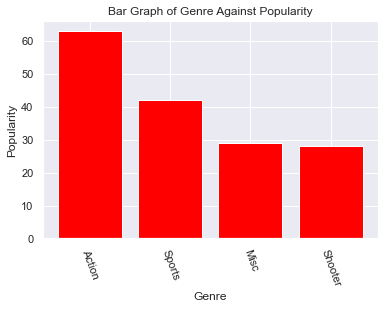

In [118]:
# Specifying X and Y Values - X-axis(Keys), Y-axis(Values)
plt.bar(Genre_dict0.keys(), Genre_dict0.values(), color='Red')

#Providing Legends and Titles
plt.title('Bar Graph of Genre Against Popularity')
plt.ylabel('Popularity')
plt.xlabel('Genre')

#Preventing X-labels Overlap
plt.xticks(rotation=290)

#Preventing Extra_Information
plt.show()

## Highest Average_Global_Sales(Genre)

In [119]:
Genre_grp0=Source_File_0.groupby(['Genre'])
Genre_Average_Global0=(dict(Genre_grp0['Global_Sales'].mean().nlargest(5)))
Genre_Average_Global0

{'Sports': 0.5164285714285715,
 'Action': 0.4492063492063492,
 'Misc': 0.42551724137931035,
 'Adventure': 0.42400000000000004,
 'Fighting': 0.405}

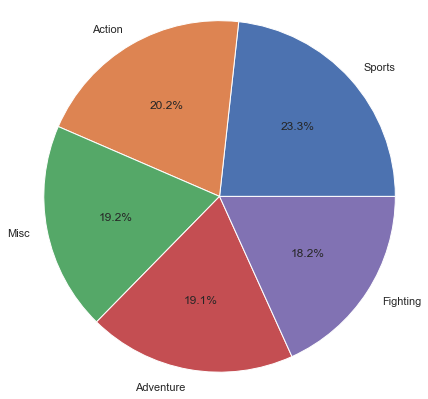

In [120]:
#Specifying the Figure Size
plt.figure(figsize=(7,7))

#Introducing the Pie Chart, autopct enables percentages on the diagram, 1f meands to 1 decimal place
plt.pie(Genre_Average_Global0.values(), labels=Genre_Average_Global0.keys(), autopct=('%1.1f%%'))

plt.axis('equal')
plt.show()